# Correlation

The objective of this notebook is to understand the concept of correlation.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

## Calculate Correlation
complete `correlation` function that calculate the correlation matrix of a data fram.

**Note:** you are not allowed to use `pandas.core.frame.DataFrame.corr()` method

In [2]:
def correlation(data: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the correlation matrix from a given dataset.

    Args:
        data (pandas.core.frame.DataFrame): The dataset, where each row represents an observation and each column represents a feature.

    Returns:
        correlation_matrix (pandas.core.frame.DataFrame): The correlation matrix.
    """

    cols = data.columns
    num_cols = len(cols)

    correlation_matrix = pd.DataFrame(np.zeros((num_cols, num_cols)), columns=cols, index=cols)

    for i in range(num_cols):
        for j in range(i, num_cols):
            col1 = data.iloc[:, i]
            col2 = data.iloc[:, j]
            
            col1_mean = np.mean(col1)
            col2_mean = np.mean(col2)
            covariance = np.sum((col1 - col1_mean) * (col2 - col2_mean)) / (len(data) - 1)

            std_col1 = np.std(col1, ddof=1)
            std_col2 = np.std(col2, ddof=1)
            
            correlation_coef = covariance / (std_col1 * std_col2)

            correlation_matrix.iloc[i, j] = correlation_coef
            correlation_matrix.iloc[j, i] = correlation_coef

    return correlation_matrix

### Convert to Datetime and Extract Features

In [8]:
df = pd.read_csv("data\\energy.csv")

df['Datetime'] = pd.to_datetime(df['Datetime'])

df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Hour'] = df['Datetime'].dt.hour

print(df.head())

             Datetime   AEP_MW  Year  Month  Hour
0 2004-12-31 01:00:00  13478.0  2004     12     1
1 2004-12-31 02:00:00  12865.0  2004     12     2
2 2004-12-31 03:00:00  12577.0  2004     12     3
3 2004-12-31 04:00:00  12517.0  2004     12     4
4 2004-12-31 05:00:00  12670.0  2004     12     5


### Plot Energy Usage Over Years

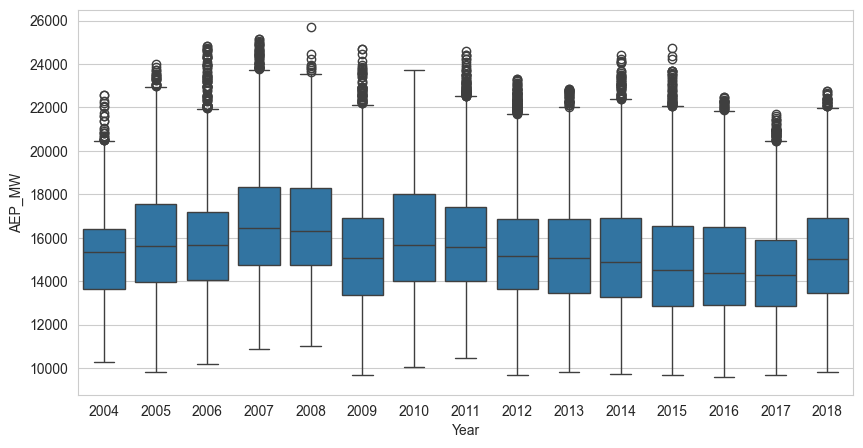

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='AEP_MW', data=df)
plt.show()

### Analyze Energy Usage Over Years

Looking at the box plot, the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile), for 2005 is longer than 2004. It indicates that the middle 50% of the data for 2005 has a wider range than for 2004. This generally suggests a higher variance for 2005 compared to 2004. 

To prove our claim, we can calculate the actual variance for both years and compare them:

In [9]:
variance_2004 = df[df['Year'] == 2004]['AEP_MW'].var() 
variance_2005 = df[df['Year'] == 2005]['AEP_MW'].var()

print("Variance for 2004: {:.2f}".format(variance_2004))
print("Variance for 2005: {:.2f}".format(variance_2005))

if variance_2005 > variance_2004:
    print("Our observations from the boxplot was valid")

Variance for 2004: 4312554.64
Variance for 2005: 6609516.55
Our observations from the boxplot was valid


### Plot Energy Usage Over Hours

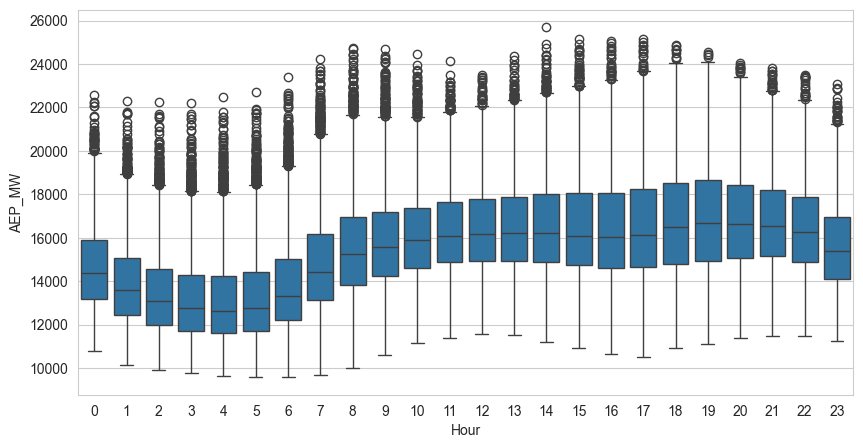

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Hour', y='AEP_MW', data=df)
plt.show()

#### Analysis:

1. **Rush Hours (15:00 to 21:00):** As you observed, the electricity consumption is the highest between 15:00 and 21:00. This period corresponds to the time when people return home from work, leading to increased use of electrical appliances, heating or cooling 
systems, and lighting. The peak is at 19:00 suggesting that the maximum power usage is at that time of the day.

2. **Low Consumption Hours (01:00 to 06:00):** The least electricity consumption occurs between 01:00 and 06:00, with the lowest at 04:00. This period is generally characterized by people being asleep, leading to minimal use of electricity.

3. **Moderate Consumption:** During the daytime (apart from the mentioned hours), the electricity consumption is moderate.

### Plot Energy Usage Over Months

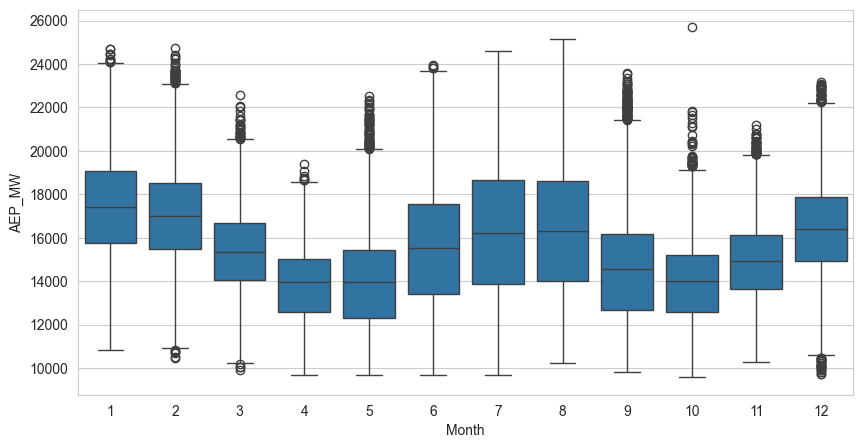

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='AEP_MW', data=df)
plt.show()

#### Analysis:
1. Higher Consumption Months: July(7), August(8), December(12), January(1), and February(2) show the highest median AEP, suggesting increased energy consumption due to higher temperatures requiring air conditioning in the summer and lower temperatures requiring heating in the winter months.

2. Lower Consumption Months: April(4), May(5), September(9), and October(10) show relatively lower median AEP, possibly due to milder weather conditions reducing the need for heating or cooling.

* Overall, the analysis shows clear seasonal patterns in energy consumption, with winter and summer being the peak periods due to heating and cooling needs, while, spring and fall have more moderate and stable consumption patterns.

### Calculate Correlation Between Specific Hours and Energy Usage

In [ ]:
hour_filtered_df = df[(df['Hour'] >= 4) & (df['Hour'] <= 13)]

correlation_matrix = correlation(hour_filtered_df[['Hour', 'AEP_MW']])
correlation_value = correlation_matrix.loc['Hour', 'AEP_MW']

print("Correlation between electricity consumption and hour from 4 to 13:", correlation_value)

Correlation between electricity consumption and hour from 4 to 13: 0.47137891043962543


### Analyze Correlation Between Specific Hours and Energy Usage

The result of the correlation calculation, which is approximately 0.471, indicates a moderate positive correlation between electricity consumption and the hour of the day from 4 AM to 1 PM. This suggests that as the time goes by within this range, the electricity consumption tends to increase.

Looking at the boxplot, the electricity consumption increases from 4 AM to 1 PM supporting the moderate positive correlation value. Therefore the boxplot is in alignment with the correlation coefficient we calculated.


### Calculate Correlation Between Specific Months and Energy Usage

In [ ]:
month2to4_filtered_df = df[(df['Month'] >= 2) & (df['Month'] <= 4)]
month10to12_filtered_df = df[(df['Month'] >= 10) & (df['Month'] <= 12)]

correlation_matrix_for_2to4 = correlation(month2to4_filtered_df[['Month', 'AEP_MW']])
correlation_value_for_2to4 = correlation_matrix_for_2to4.loc['Month', 'AEP_MW']

correlation_matrix_for_10to12 = correlation(month10to12_filtered_df[['Month', 'AEP_MW']])
correlation_value_for_10to12 = correlation_matrix_for_10to12.loc['Month', 'AEP_MW']

print("Correlation between electricity consumption and Months from 2nd to 4th:", correlation_value_for_2to4)
print("Correlation between electricity consumption and Months from 10th to 12th:", correlation_value_for_10to12)

Correlation between electricity consumption and Months from 2nd to 4th: -0.558244574616674
Correlation between electricity consumption and Months from 10th to 12th: 0.4738379625643042


### Analyze Correlation Between Specific Months and Energy Usage

1. **February to April:** The negative correlation of -0.5582 indicates that as the months progress from February(2nd) to April(4th), the electricity consumption tends to decrease (you can see the relation from the [boxplot](#Plot-Energy-Usage-Over-Months) for the 2nd to 4th months). The negative correlation highlights the typical decline in electricity consumption as temperatures rise, reducing heating needs. This seasonal change from colder to milder weather directly impacts energy usage.

2. **October to December:** The positive correlation of 0.4738 indicates that as the months progress from October(10th) to December(12th), the electricity consumption tends to increase (you can see the relation from the [boxplot](#Plot-Energy-Usage-Over-Months) for the 10th to 12th months). The positive correlation reflects the increase in electricity consumption as temperatures fall, prompting higher heating demands. This seasonal change from milder to colder weather directly impacts increased energy usage.


## Causal Effect

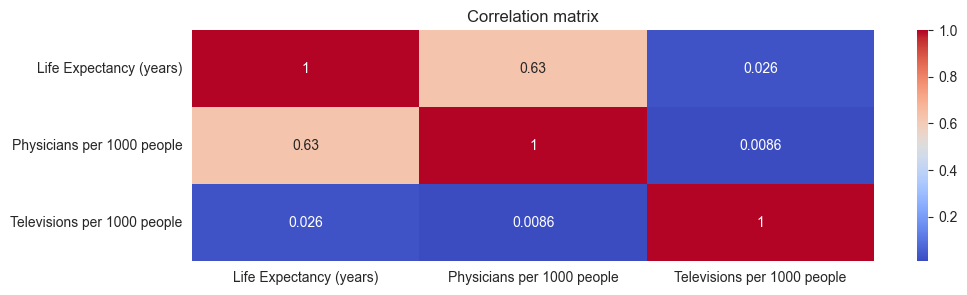

In [ ]:
df = pd.read_csv("data\\TV_LE_Physician.csv")

numeric_df = df.drop(columns=['Country'])
correlation_matrix = correlation(numeric_df) 

plt.figure(figsize=(11, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm") 
plt.title("Correlation matrix")
plt.show()

The calculated correlations show the relationship between the variables but do not imply causation. In other words, Correlation exists but it does not mean there is a direct causal relationship. 

For example, higher life expectancy correlating with more physicians does not necessarily mean that the increase in physicians causes higher life expectancy; other factors like economic development and public healthcare also play a role.

Therefore, The observed correlations could be influenced by underlying factors such as economic development, government, healthcare policies, or cultural differences, which affect all the variables in the study. Thus, while correlations provide valuable insights, they do not imply causation of the variables.